# Simple test for DTW-SOM implementation

### 1. Load packages

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from pyclustering.nnet.som import type_conn
# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import dtw_som

### 2. Generate dummy dataset

First we need to define the functions to generate the dataset. This is a simple dataset with two clearly defined clusters - one we a noisy sin function centered at 0 and another with a noisy line centered at 10.

In [2]:
def gen_noisy_sine_list(f0, fs, mean_dur, size):
    final_list = []
    for i in range(size):
        dur = random.sample([mean_dur-1, mean_dur, mean_dur+1], 1)[0]
        t = np.arange(dur)
        sinusoid = np.sin(2*np.pi*t*(f0/fs))
        noise = np.random.normal(0,0.3, dur)
        noisy_sinusoid = noise + sinusoid
        final_list.append(noisy_sinusoid)
    return final_list

def gen_noisy_list(mean_dur, size):
    final_list = []
    for i in range(size):
        dur = random.sample([mean_dur-1, mean_dur, mean_dur+1], 1)[0]
        noise = np.random.normal(0,0.3, dur)+10
        final_list.append(noise)
    return final_list

Now we can generate the dummy dataset:

In [3]:
sin_dataset = gen_noisy_sine_list(1, 10, 25, 50) + gen_noisy_list(20, 50)
anchors = [sin_dataset[0], sin_dataset[-1]]
random.shuffle(sin_dataset)
len(sin_dataset)

100

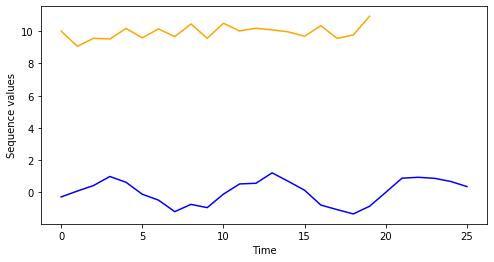

In [4]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(anchors[0])), anchors[0], color='blue')
plt.plot(np.arange(len(anchors[1])), anchors[1], color='orange')
plt.ylabel("Sequence values")
plt.xlabel("Time")
plt.show()

### 3. Train DTW-SOM with random initialization and view results

In [5]:
%time
rows = 3
cols = 3
structure = type_conn.grid_four
network = dtw_som.DtwSom(rows, cols, structure)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [6]:
%%time
network.train(sin_dataset, 20)

Epoch 1 achieved an average quantization error of 1.1243
Epoch 2 achieved an average quantization error of 1.1144
Epoch 3 achieved an average quantization error of 1.0921
Epoch 4 achieved an average quantization error of 1.0835
Epoch 5 achieved an average quantization error of 1.0817
Epoch 6 achieved an average quantization error of 1.0758
Epoch 7 achieved an average quantization error of 1.0733
Epoch 8 achieved an average quantization error of 1.071
Epoch 9 achieved an average quantization error of 1.0695
Epoch 10 achieved an average quantization error of 1.0682
Epoch 11 achieved an average quantization error of 1.0672
Epoch 12 achieved an average quantization error of 1.0662
Epoch 13 achieved an average quantization error of 1.0652
Epoch 14 achieved an average quantization error of 1.0613
Epoch 15 achieved an average quantization error of 1.0583
Epoch 16 achieved an average quantization error of 1.0558
Epoch 17 achieved an average quantization error of 1.0549
Epoch 18 achieved an ave

20

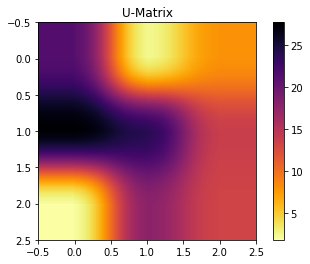

In [7]:
network.show_distance_matrix()

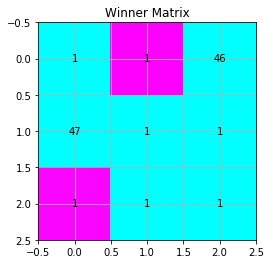

In [8]:
network.show_winner_matrix()

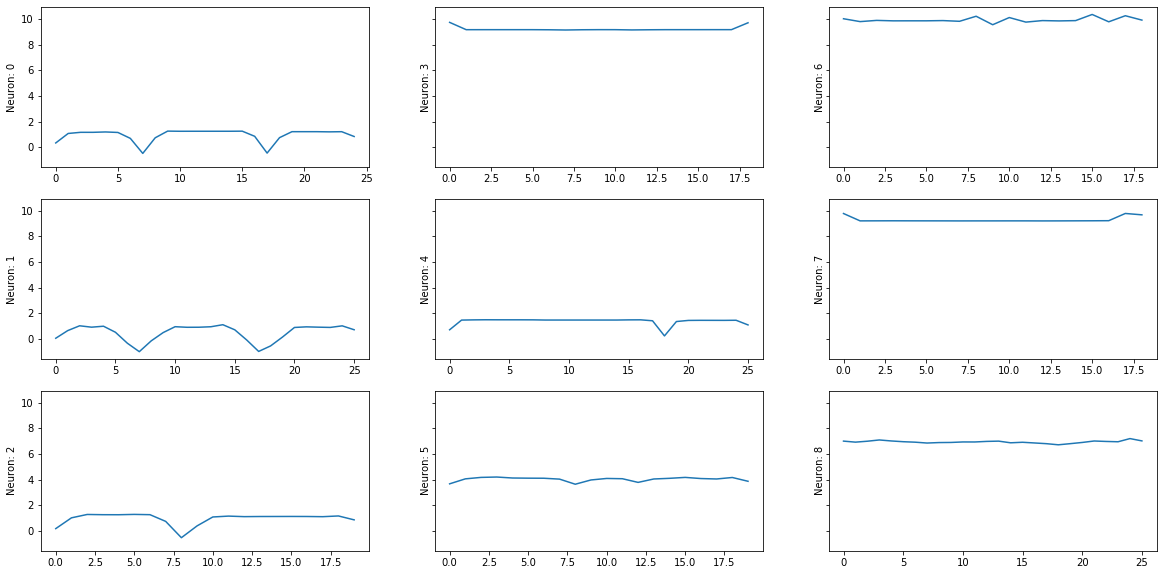

In [9]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(20, 10), sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3)
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_ylabel("Neuron: "+str(neuron_index))
plt.show()

### 4. Train DTW-SOM with anchors initialization and view results

In [10]:
%time
rows = 3
cols = 3
structure = type_conn.grid_four
parameters = dtw_som.DtwSomParameters()
parameters.init_type = dtw_som.DtwTypeInit.anchors
network = dtw_som.DtwSom(rows, cols, structure, parameters=parameters)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs


In [11]:
%%time
network.train(sin_dataset, 20, anchors=anchors)

Epoch 1 achieved an average quantization error of 1.3093
Epoch 2 achieved an average quantization error of 1.3257
Epoch 3 achieved an average quantization error of 1.3319
Epoch 4 achieved an average quantization error of 1.3256
Epoch 5 achieved an average quantization error of 1.2306
Epoch 6 achieved an average quantization error of 1.1899
Epoch 7 achieved an average quantization error of 1.1493
Epoch 8 achieved an average quantization error of 1.123
Epoch 9 achieved an average quantization error of 1.1051
Epoch 10 achieved an average quantization error of 1.0941
Epoch 11 achieved an average quantization error of 1.0851
Epoch 12 achieved an average quantization error of 1.0786
Epoch 13 achieved an average quantization error of 1.074
Epoch 14 achieved an average quantization error of 1.0581
Epoch 15 achieved an average quantization error of 1.0464
Epoch 16 achieved an average quantization error of 1.042
Epoch 17 achieved an average quantization error of 1.0384
Epoch 18 achieved an avera

20

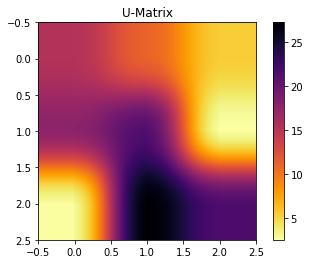

In [12]:
network.show_distance_matrix()

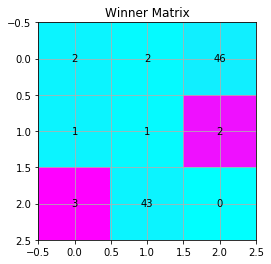

In [13]:
network.show_winner_matrix()

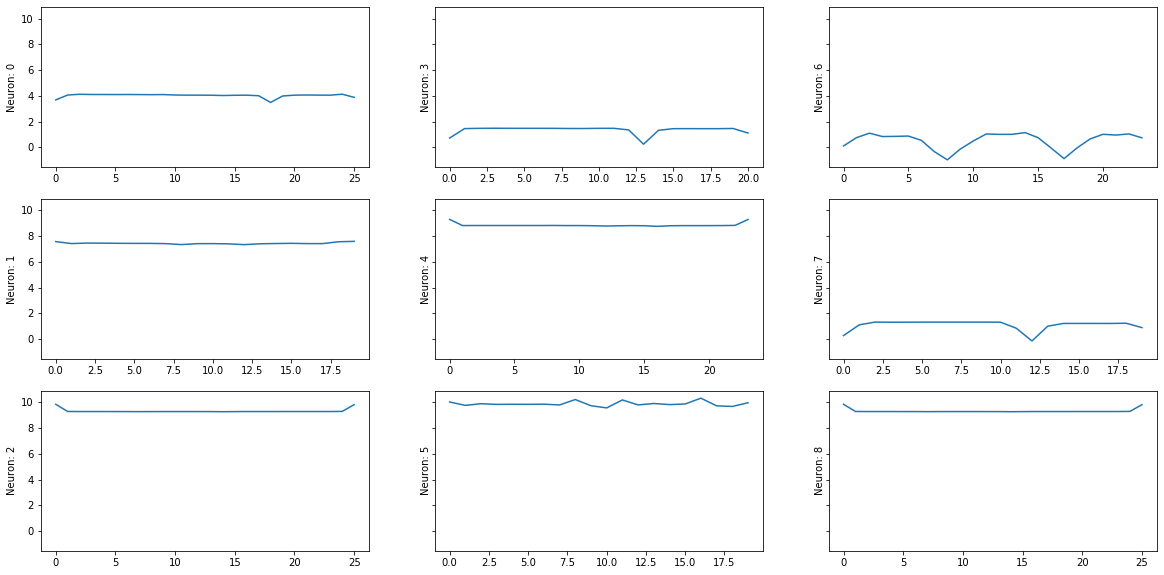

In [14]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(20, 10), sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3)
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_ylabel("Neuron: "+str(neuron_index))
plt.show()